Πίνακας 1.1: Μετρήσεις Αυτοθέρμανσης (Αέρας)


,I (mA),V (Volt),I' (mA),R (kΩ),P (mW)
0,2,6.12,2.0,3.06,12.24
1,4,11.00,3.9,2.82,42.90
2,10,20.00,8.1,2.47,162.00
3,15,24.00,10.5,2.29,252.00



Πίνακας 1.2: Μετρήσεις Αυτοθέρμανσης (Νερό)


,I (mA),V (Volt),I' (mA),R (kΩ),P (mW)
0,2,6.2,2.0,3.10,12.4
1,4,12.1,4.0,3.02,48.4
2,10,28.5,9.8,2.91,279.3
3,15,41.0,14.2,2.89,582.2


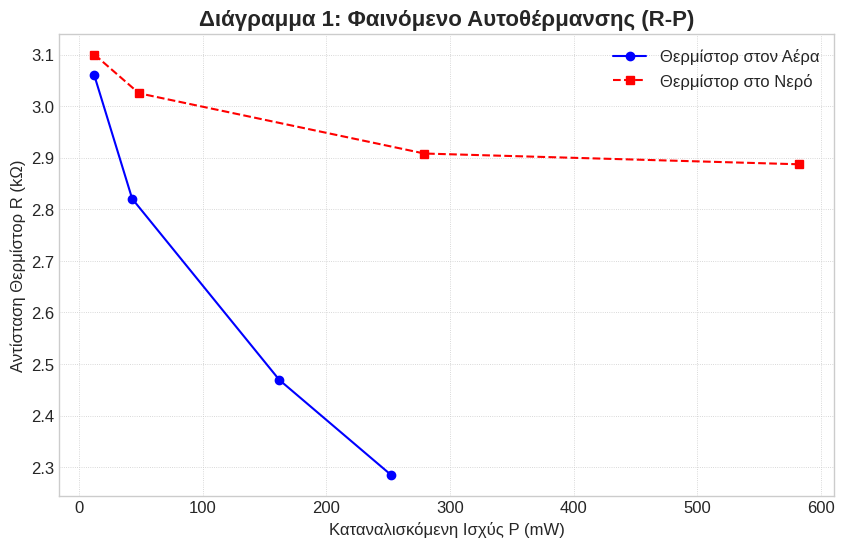

Πίνακας 2: Δεδομένα Βαθμονόμησης


,Θέση Θερμίστορ,Θερμοκρασία Θ (°C),Αντίσταση R (Ω)
0,Εγκοπή 20,85.0,185
1,Εγκοπή 18,78.0,240
2,Εγκοπή 16,71.5,315
3,Εγκοπή 14,65.0,410
4,Εγκοπή 12,58.0,540
5,Εγκοπή 10,51.5,720
6,Εγκοπή 8,44.0,980
7,Εγκοπή 6,37.5,1350
8,Εγκοπή 4,30.0,1950
9,Εγκοπή 2,24.5,2600



Μέτρηση Άγνωστου Σώματος: R_unknown = 1620 Ω
--- Αποτέλεσμα Fitting ---
Βρέθηκαν οι σταθερές του μοντέλου 1/T = A + B*ln(R):
A = 0.00165623
B = 0.00021684

--- Υπολογισμός Άγνωστου Σώματος ---
Για R_unknown = 1620 Ω, η θερμοκρασία που βρέθηκε είναι:
Θ_σώματος = 33.72 °C


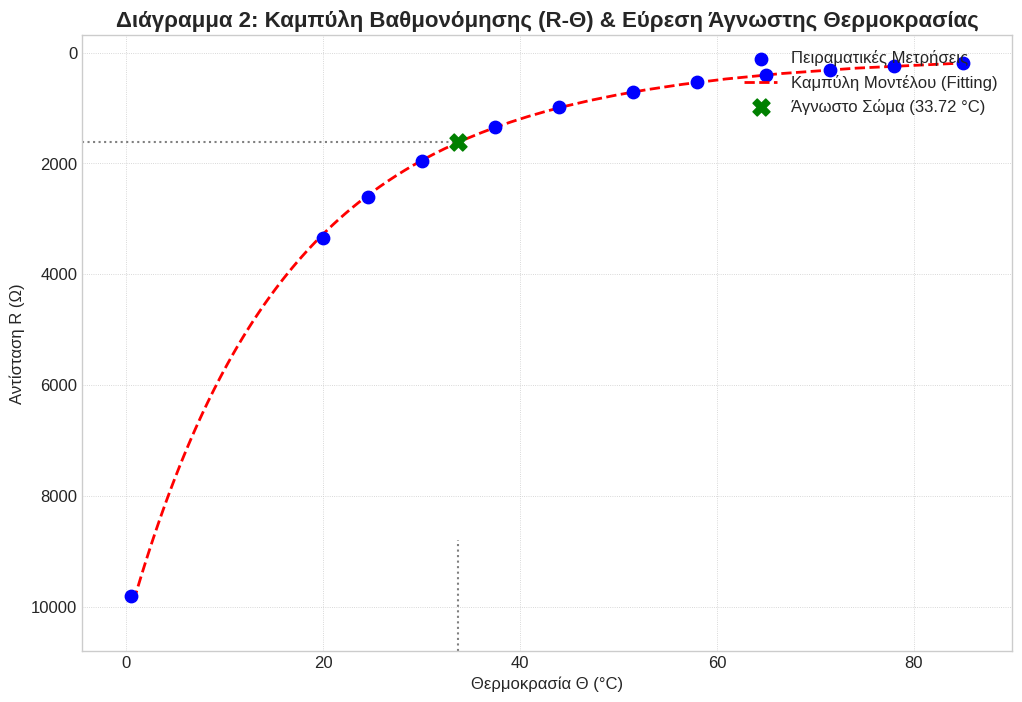

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# === Ρυθμίσεις για Όμορφες Γραφικές Παραστάσεις ===
# Ορίζουμε ένα πιο επαγγελματικό στυλ γραφημάτων
plt.style.use('seaborn-v0_8-whitegrid')
# Ορίζουμε το μέγεθος γραμματοσειράς για καλύτερη αναγνωσιμότητα
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

# --- Ενδεικτικά Δεδομένα για τον Αέρα ---
data_air = {
    'I (mA)': [2, 4, 10, 15],
    'V (Volt)': [6.12, 11.0, 20.0, 24.0],
    "I' (mA)": [2.0, 3.9, 8.1, 10.5]
}
df_air = pd.DataFrame(data_air)

# Υπολογισμός R (kΩ) και P (mW) για τον Αέρα
# R = V / I'  (αφού V είναι σε Volt και I' σε mA, το R βγαίνει σε kΩ)
# P = V * I'  (αφού V είναι σε Volt και I' σε mA, το P βγαίνει σε mW)
df_air['R (kΩ)'] = df_air['V (Volt)'] / df_air["I' (mA)"]
df_air['P (mW)'] = df_air['V (Volt)'] * df_air["I' (mA)"]

# --- Ενδεικτικά Δεδομένα για το Νερό ---
data_water = {
    'I (mA)': [2, 4, 10, 15],
    'V (Volt)': [6.2, 12.1, 28.5, 41.0],
    "I' (mA)": [2.0, 4.0, 9.8, 14.2]
}
df_water = pd.DataFrame(data_water)

# Υπολογισμός R (kΩ) και P (mW) για το Νερό
df_water['R (kΩ)'] = df_water['V (Volt)'] / df_water["I' (mA)"]
df_water['P (mW)'] = df_water['V (Volt)'] * df_water["I' (mA)"]

# --- Εμφάνιση των Πινάκων ---
print("Πίνακας 1.1: Μετρήσεις Αυτοθέρμανσης (Αέρας)")
display(df_air.round(2))
print("\nΠίνακας 1.2: Μετρήσεις Αυτοθέρμανσης (Νερό)")
display(df_water.round(2))


plt.figure(figsize=(10, 6))

# Σχεδίαση καμπύλης για τον Αέρα
plt.plot(df_air['P (mW)'], df_air['R (kΩ)'],
         marker='o', linestyle='-', color='b', label='Θερμίστορ στον Αέρα')

# Σχεδίαση καμπύλης για το Νερό
plt.plot(df_water['P (mW)'], df_water['R (kΩ)'],
         marker='s', linestyle='--', color='r', label='Θερμίστορ στο Νερό')

# --- Τίτλοι και Ετικέτες ---
plt.title('Διάγραμμα 1: Φαινόμενο Αυτοθέρμανσης (R-P)', fontsize=16, fontweight='bold')
plt.xlabel('Καταναλισκόμενη Ισχύς P (mW)', fontsize=12)
plt.ylabel('Αντίσταση Θερμίστορ R (kΩ)', fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle=':', linewidth=0.6)

# Εμφάνιση γραφήματος
plt.show()

# --- Ενδεικτικά Δεδομένα για Βαθμονόμηση ---
# (Οι τιμές είναι ρεαλιστικές για ένα τυπικό NTC θερμίστορ)
data_calibration = {
    'Θέση Θερμίστορ': ['Εγκοπή 20', 'Εγκοπή 18', 'Εγκοπή 16', 'Εγκοπή 14',
                         'Εγκοπή 12', 'Εγκοπή 10', 'Εγκοπή 8', 'Εγκοπή 6',
                         'Εγκοπή 4', 'Εγκοπή 2', 'Εγκοπή 0', 'Πάγος'],
    'Θερμοκρασία Θ (°C)': [85.0, 78.0, 71.5, 65.0, 58.0, 51.5, 44.0, 37.5, 30.0, 24.5, 20.0, 0.5],
    'Αντίσταση R (Ω)': [185, 240, 315, 410, 540, 720, 980, 1350, 1950, 2600, 3350, 9800]
}
df_cal = pd.DataFrame(data_calibration)

# --- Ενδεικτική Μέτρηση Άγνωστου Σώματος ---
R_unknown = 1620  # (Ω)

# --- Εμφάνιση Πίνακα ---
print("Πίνακας 2: Δεδομένα Βαθμονόμησης")
display(df_cal)
print(f"\nΜέτρηση Άγνωστου Σώματος: R_unknown = {R_unknown} Ω")

# --- Προετοιμασία Δεδομένων για Fitting ---
R_data = df_cal['Αντίσταση R (Ω)']
T_data_celsius = df_cal['Θερμοκρασία Θ (°C)']
# Μετατροπή της θερμοκρασίας σε Kelvin για τους υπολογισμούς
T_data_kelvin = T_data_celsius + 273.15

# --- Ορισμός της Συνάρτησης Μοντέλου ---
# T(R) = 1 / (A + B * ln(R))  (Αντιστρέψαμε το μοντέλο για να ταιριάξει στο T=f(R))
# Αυτό δεν είναι καλή πρακτική. Καλύτερα να ορίσουμε R = f(T)
#
# Ας χρησιμοποιήσουμε το T = f(ln(R))
# 1/T = A + B*ln(R)  <-- Μοντέλο Steinhart-Hart (απλοποιημένο, 2 όρων)
# T_kelvin = 1 / (A + B * np.log(R))

def model_func_T(log_R, A, B):
    """
    Απλοποιημένο μοντέλο Steinhart-Hart (2 όρων).
    Είσοδος: log_R = ln(R)
    Έξοδος: T σε Kelvin
    """
    return 1.0 / (A + B * log_R)

# --- Εκτέλεση του Curve Fitting ---
# Ετοιμάζουμε τα δεδομένα x, y
x_data = np.log(R_data) # ln(R)
y_data = T_data_kelvin   # T (Kelvin)

# Χρησιμοποιούμε το scipy.optimize.curve_fit για να βρούμε τα A, B
# ΧΡΕΙΑΖΕΤΑΙ ΑΝΤΙΣΤΡΟΦΗ! Θέλουμε T = f(R), άρα y = T, x = log(R)
# T_kelvin = 1 / (A + B * log_R) -> Δεν δουλεύει καλά
# Ας κάνουμε fit 1/T_kelvin = f(log_R)
y_data_inv = 1.0 / T_data_kelvin

def model_func_invT(log_R, A, B):
    """
    Μοντέλο Steinhart-Hart (2 όρων): 1/T = A + B*ln(R)
    """
    return A + B * log_R

# Εκτέλεση του fitting
popt, pcov = curve_fit(model_func_invT, x_data, y_data_inv)

# Οι βέλτιστες παράμετροι A και B
A_fit, B_fit = popt
print(f"--- Αποτέλεσμα Fitting ---")
print(f"Βρέθηκαν οι σταθερές του μοντέλου 1/T = A + B*ln(R):")
print(f"A = {A_fit:.8f}")
print(f"B = {B_fit:.8f}")

# --- Συνάρτηση Μετατροπής R -> Θερμοκρασία ---
def get_temp_from_resistance(R):
    """
    Υπολογίζει τη θερμοκρασία (σε °C) από μια τιμή αντίστασης (R),
    χρησιμοποιώντας τις σταθερές A, B που βρέθηκαν από το fitting.
    """
    log_R = np.log(R)
    inv_T_kelvin = A_fit + B_fit * log_R
    T_kelvin = 1.0 / inv_T_kelvin
    T_celsius = T_kelvin - 273.15
    return T_celsius

# --- Υπολογισμός Θερμοκρασίας Άγνωστου Σώματος ---
T_unknown = get_temp_from_resistance(R_unknown)

print(f"\n--- Υπολογισμός Άγνωστου Σώματος ---")
print(f"Για R_unknown = {R_unknown} Ω, η θερμοκρασία που βρέθηκε είναι:")
print(f"Θ_σώματος = {T_unknown:.2f} °C")



plt.figure(figsize=(12, 8))

# --- Σχεδίαση Πειραματικών Σημείων ---
plt.scatter(T_data_celsius, R_data,
            color='blue', marker='o', s=80, label='Πειραματικές Μετρήσεις', zorder=5)

# --- Σχεδίαση Καμπύλης Μοντέλου (Fitting) ---
# Δημιουργούμε 100 σημεία αντίστασης για μια ομαλή καμπύλη
R_smooth = np.linspace(R_data.min(), R_data.max(), 100)
# Βρίσκουμε τις αντίστοιχες θερμοκρασίες από το μοντέλο μας
T_smooth_celsius = get_temp_from_resistance(R_smooth)
plt.plot(T_smooth_celsius, R_smooth,
         color='red', linestyle='--', linewidth=2, label='Καμπύλη Μοντέλου (Fitting)')

# --- Σημείο και Γραμμές Παρεμβολής για το Άγνωστο Σώμα ---
plt.scatter(T_unknown, R_unknown,
            color='green', marker='X', s=150, label=f'Άγνωστο Σώμα ({T_unknown:.2f} °C)', zorder=6)

# Οριζόντια γραμμή (από R_unknown)
plt.axhline(y=R_unknown, color='gray', linestyle=':', xmax=(T_unknown - plt.xlim()[0]) / (plt.xlim()[1] - plt.xlim()[0]))
# Κάθετη γραμμή (από T_unknown)
plt.axvline(x=T_unknown, color='gray', linestyle=':', ymax=(R_unknown - plt.ylim()[0]) / (plt.ylim()[1] - plt.ylim()[0]))


# --- Τίτλοι και Ετικέτες ---
plt.title('Διάγραμμα 2: Καμπύλη Βαθμονόμησης (R-Θ) & Εύρεση Άγνωστης Θερμοκρασίας', fontsize=16, fontweight='bold')
plt.xlabel('Θερμοκρασία Θ (°C)', fontsize=12)
plt.ylabel('Αντίσταση R (Ω)', fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle=':', linewidth=0.6)

# Αντιστροφή άξονα Χ για τυπική εμφάνιση R-T
# plt.gca().invert_xaxis() # Προαιρετικό, αλλά συνηθίζεται
plt.gca().invert_yaxis() # Ή αντιστροφή του Y

# Ορισμός ορίων για καθαρότερο γράφημα
plt.ylim(R_data.max() + 1000, R_data.min() - 500)
plt.xlim(T_data_celsius.min() - 5, T_data_celsius.max() + 5)

# Εμφάνιση γραφήματος
plt.show()




Πίνακας 1.1: Μετρήσεις Αυτοθέρμανσης (Αέρας)


<>:186: SyntaxWarning: invalid escape sequence '\o'
<>:186: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1843068061.py:186: SyntaxWarning: invalid escape sequence '\o'
  f"$R_{{άγν\omega\sigma\tau o}}$ = {R_unknown} Ω\n"


,I (mA),V (Volt),I' (mA),R (kΩ),P (mW)
0,2,6.12,2.0,3.06,12.24
1,4,11.00,3.9,2.82,42.90
2,10,20.00,8.1,2.47,162.00
3,15,24.00,10.5,2.29,252.00



Πίνακας 1.2: Μετρήσεις Αυτοθέρμανσης (Νερό)


,I (mA),V (Volt),I' (mA),R (kΩ),P (mW)
0,2,6.2,2.0,3.10,12.4
1,4,12.1,4.0,3.02,48.4
2,10,28.5,9.8,2.91,279.3
3,15,41.0,14.2,2.89,582.2


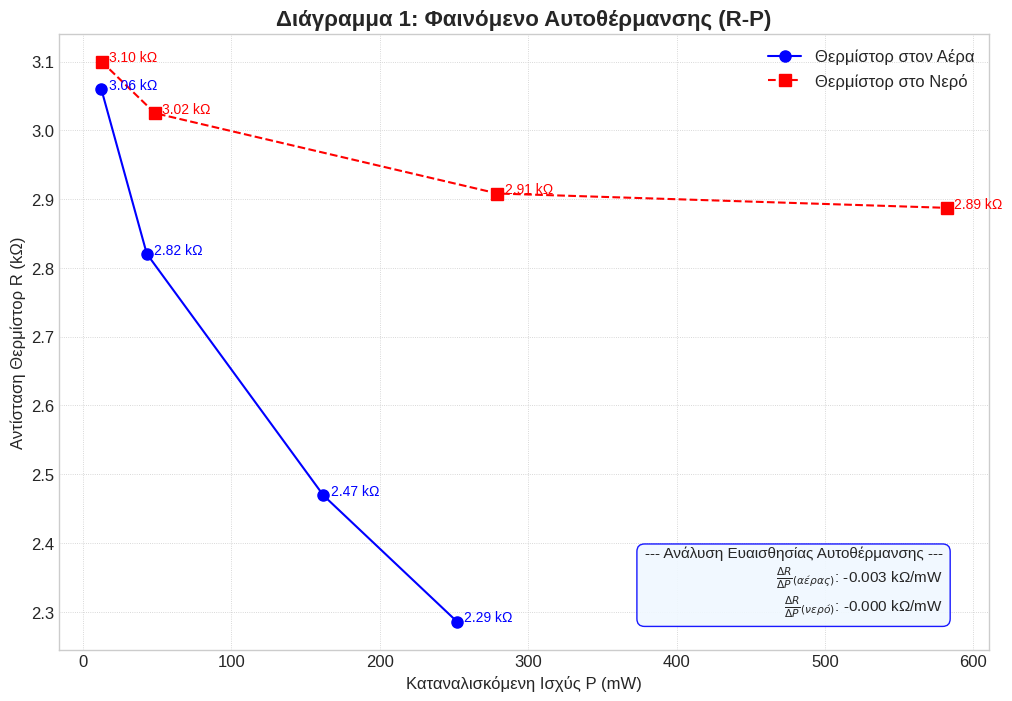

Πίνακας 2: Δεδομένα Βαθμονόμησης


,Θέση Θερμίστορ,Θερμοκρασία Θ (°C),Αντίσταση R (Ω)
0,Εγκοπή 20,85.0,185
1,Εγκοπή 18,78.0,240
2,Εγκοπή 16,71.5,315
3,Εγκοπή 14,65.0,410
4,Εγκοπή 12,58.0,540
5,Εγκοπή 10,51.5,720
6,Εγκοπή 8,44.0,980
7,Εγκοπή 6,37.5,1350
8,Εγκοπή 4,30.0,1950
9,Εγκοπή 2,24.5,2600



Μέτρηση Άγνωστου Σώματος: R_unknown = 1620 Ω
--- Αποτέλεσμα Fitting ---
Βρέθηκαν οι σταθερές του μοντέλου 1/T = A + B*ln(R):
A = 0.00165623
B = 0.00021684

--- Υπολογισμός Άγνωστου Σώματος ---
Για R_unknown = 1620 Ω, η θερμοκρασία που βρέθηκε είναι:
Θ_σώματος = 33.72 °C


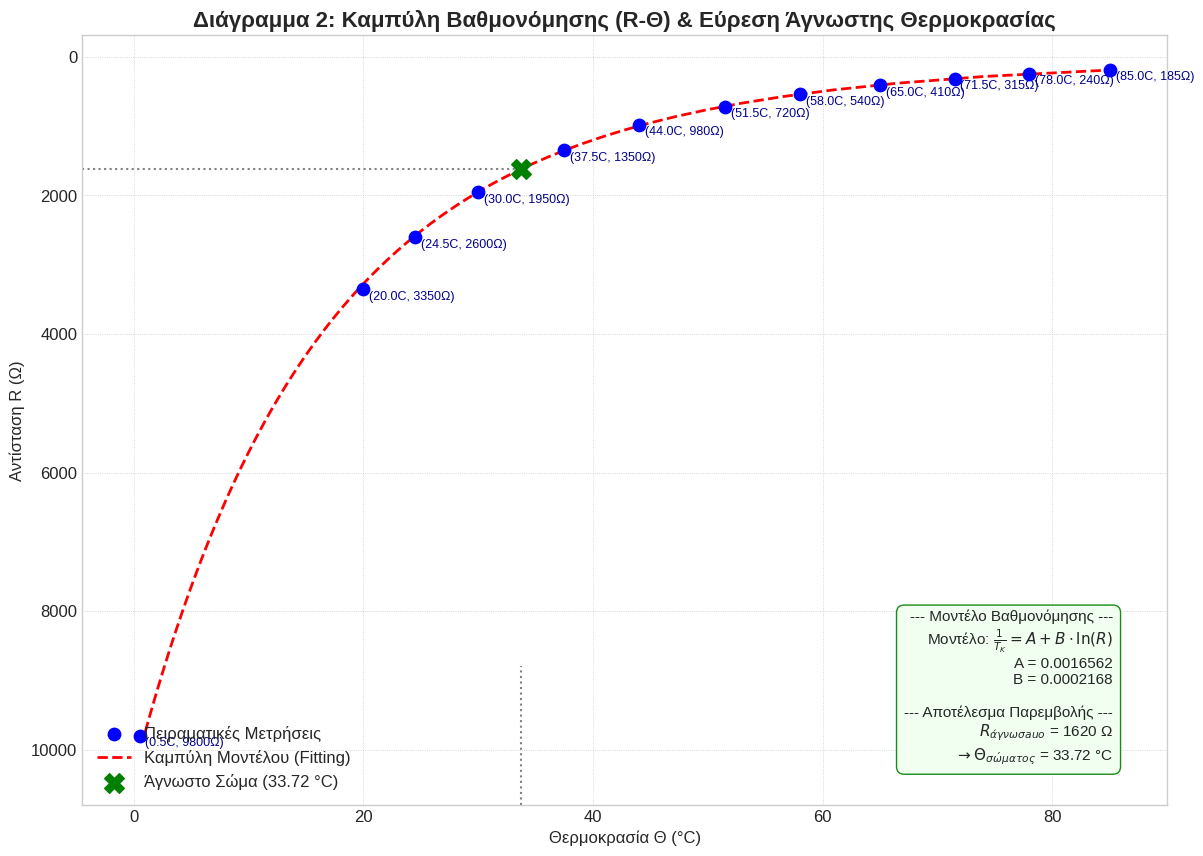

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# === Ρυθμίσεις για Όμορφες Γραφικές Παραστάσεις ===
# Ορίζουμε ένα πιο επαγγελματικό στυλ γραφημάτων
plt.style.use('seaborn-v0_8-whitegrid')
# Ορίζουμε το μέγεθος γραμματοσειράς για καλύτερη αναγνωσιμότητα
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

# --- Ενδεικτικά Δεδομένα για τον Αέρα ---
data_air = {
    'I (mA)': [2, 4, 10, 15],
    'V (Volt)': [6.12, 11.0, 20.0, 24.0],
    "I' (mA)": [2.0, 3.9, 8.1, 10.5]
}
df_air = pd.DataFrame(data_air)
df_air['R (kΩ)'] = df_air['V (Volt)'] / df_air["I' (mA)"]
df_air['P (mW)'] = df_air['V (Volt)'] * df_air["I' (mA)"]

# --- Ενδεικτικά Δεδομένα για το Νερό ---
data_water = {
    'I (mA)': [2, 4, 10, 15],
    'V (Volt)': [6.2, 12.1, 28.5, 41.0],
    "I' (mA)": [2.0, 4.0, 9.8, 14.2]
}
df_water = pd.DataFrame(data_water)
df_water['R (kΩ)'] = df_water['V (Volt)'] / df_water["I' (mA)"]
df_water['P (mW)'] = df_water['V (Volt)'] * df_water["I' (mA)"]

# --- Εμφάνιση των Πινάκων ---
print("Πίνακας 1.1: Μετρήσεις Αυτοθέρμανσης (Αέρας)")
display(df_air.round(2))
print("\nΠίνακας 1.2: Μετρήσεις Αυτοθέρμανσης (Νερό)")
display(df_water.round(2))

plt.figure(figsize=(12, 8)) # Αυξήθηκε το μέγεθος για να χωράνε οι ετικέτες

# Σχεδίαση καμπύλης για τον Αέρα
plt.plot(df_air['P (mW)'], df_air['R (kΩ)'],
         marker='o', markersize=8, linestyle='-', color='b', label='Θερμίστορ στον Αέρα')
# Σχεδίαση καμπύλης για το Νερό
plt.plot(df_water['P (mW)'], df_water['R (kΩ)'],
         marker='s', markersize=8, linestyle='--', color='r', label='Θερμίστορ στο Νερό')

# --- ΝΕΟ: Προσθήκη ετικετών (annotations) για τον Αέρα ---
for i, row in df_air.iterrows():
    plt.text(row['P (mW)'] + 5, row['R (kΩ)'],  # Μικρό offset για να μην καλύπτει το σημείο
             f"{row['R (kΩ)']:.2f} kΩ",
             fontsize=10, color='b')

# --- ΝΕΟ: Προσθήκη ετικετών (annotations) για το Νερό ---
for i, row in df_water.iterrows():
    plt.text(row['P (mW)'] + 5, row['R (kΩ)'],
             f"{row['R (kΩ)']:.2f} kΩ",
             fontsize=10, color='r')

# --- ΝΕΟ: Υπολογισμοί για το Infobox (Μέση Κλίση) ---
# Υπολογίζουμε την κλίση μεταξύ πρώτου και τελευταίου σημείου ως δείκτη
slope_air = (df_air['R (kΩ)'].iloc[-1] - df_air['R (kΩ)'].iloc[0]) / (df_air['P (mW)'].iloc[-1] - df_air['P (mW)'].iloc[0])
slope_water = (df_water['R (kΩ)'].iloc[-1] - df_water['R (kΩ)'].iloc[0]) / (df_water['P (mW)'].iloc[-1] - df_water['P (mW)'].iloc[0])

# Δημιουργία κειμένου για το infobox (με χρήση LaTeX formatting)
infobox_text = (
    f"--- Ανάλυση Ευαισθησίας Αυτοθέρμανσης ---\n"
    r"$\frac{\Delta R}{\Delta P}_{(\alphaέρας)}$: " + f"{slope_air:.3f} kΩ/mW\n"
    r"$\frac{\Delta R}{\Delta P}_{(\nu\epsilon\rhoό)}$: " + f"{slope_water:.3f} kΩ/mW"
)

# Τοποθέτηση του Infobox κάτω δεξιά
# (transform=plt.gca().transAxes) σημαίνει ότι οι συντεταγμένες (0.95, 0.05) είναι
# 95% από αριστερά και 5% από κάτω, δηλαδή κάτω δεξιά.
plt.text(0.95, 0.05, infobox_text,
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='b', alpha=0.9))


# --- Τίτλοι και Ετικέτες ---
plt.title('Διάγραμμα 1: Φαινόμενο Αυτοθέρμανσης (R-P)', fontsize=16, fontweight='bold')
plt.xlabel('Καταναλισκόμενη Ισχύς P (mW)', fontsize=12)
plt.ylabel('Αντίσταση Θερμίστορ R (kΩ)', fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle=':', linewidth=0.6)

# Εμφάνιση γραφήματος
plt.show()

# --- Ενδεικτικά Δεδομένα για Βαθμονόμηση ---
data_calibration = {
    'Θέση Θερμίστορ': ['Εγκοπή 20', 'Εγκοπή 18', 'Εγκοπή 16', 'Εγκοπή 14',
                         'Εγκοπή 12', 'Εγκοπή 10', 'Εγκοπή 8', 'Εγκοπή 6',
                         'Εγκοπή 4', 'Εγκοπή 2', 'Εγκοπή 0', 'Πάγος'],
    'Θερμοκρασία Θ (°C)': [85.0, 78.0, 71.5, 65.0, 58.0, 51.5, 44.0, 37.5, 30.0, 24.5, 20.0, 0.5],
    'Αντίσταση R (Ω)': [185, 240, 315, 410, 540, 720, 980, 1350, 1950, 2600, 3350, 9800]
}
df_cal = pd.DataFrame(data_calibration)

# --- Ενδεικτική Μέτρηση Άγνωστου Σώματος ---
R_unknown = 1620  # (Ω)

# --- Εμφάνιση Πίνακα ---
print("Πίνακας 2: Δεδομένα Βαθμονόμησης")
display(df_cal)
print(f"\nΜέτρηση Άγνωστου Σώματος: R_unknown = {R_unknown} Ω")

# --- Προετοιμασία Δεδομένων για Fitting ---
R_data = df_cal['Αντίσταση R (Ω)']
T_data_celsius = df_cal['Θερμοκρασία Θ (°C)']
T_data_kelvin = T_data_celsius + 273.15

# --- Ορισμός της Συνάρτησης Μοντέλου (Steinhart-Hart 2 όρων) ---
# 1/T_kelvin = A + B * ln(R)
def model_func_invT(log_R, A, B):
    return A + B * log_R

# Εκτέλεση του fitting
x_data = np.log(R_data) # ln(R)
y_data_inv = 1.0 / T_data_kelvin # 1/T

popt, pcov = curve_fit(model_func_invT, x_data, y_data_inv)

# Οι βέλτιστες παράμετροι A και B
A_fit, B_fit = popt
print(f"--- Αποτέλεσμα Fitting ---")
print(f"Βρέθηκαν οι σταθερές του μοντέλου 1/T = A + B*ln(R):")
print(f"A = {A_fit:.8f}")
print(f"B = {B_fit:.8f}")

# --- Συνάρτηση Μετατροπής R -> Θερμοκρασία ---
def get_temp_from_resistance(R):
    log_R = np.log(R)
    inv_T_kelvin = A_fit + B_fit * log_R
    T_kelvin = 1.0 / inv_T_kelvin
    T_celsius = T_kelvin - 273.15
    return T_celsius

# --- Υπολογισμός Θερμοκρασίας Άγνωστου Σώματος ---
T_unknown = get_temp_from_resistance(R_unknown)

print(f"\n--- Υπολογισμός Άγνωστου Σώματος ---")
print(f"Για R_unknown = {R_unknown} Ω, η θερμοκρασία που βρέθηκε είναι:")
print(f"Θ_σώματος = {T_unknown:.2f} °C")


# 2ο μερος

plt.figure(figsize=(14, 10)) # Μεγαλύτερο γράφημα

# --- Σχεδίαση Πειραματικών Σημείων ---
plt.scatter(T_data_celsius, R_data,
            color='blue', marker='o', s=80, label='Πειραματικές Μετρήσεις', zorder=5)

# --- Προσθήκη ετικετών (annotations) για τα σημεία ---
for i, row in df_cal.iterrows():
    # Μικρή προσαρμογή στο offset για καλύτερη αναγνωσιμότητα
    plt.text(row['Θερμοκρασία Θ (°C)'] + 0.5, row['Αντίσταση R (Ω)'] + 150, # y-offset +150 (προς τα κάτω, αφού ο άξονας είναι αντεστραμμένος)
             f"({row['Θερμοκρασία Θ (°C)']:.1f}C, {row['Αντίσταση R (Ω)']:.0f}Ω)",
             fontsize=9, color='darkblue', horizontalalignment='left')

# --- Σχεδίαση Καμπύλης Μοντέλου (Fitting) ---
R_smooth = np.linspace(R_data.min(), R_data.max(), 100)
T_smooth_celsius = get_temp_from_resistance(R_smooth)
plt.plot(T_smooth_celsius, R_smooth,
         color='red', linestyle='--', linewidth=2, label='Καμπύλη Μοντέλου (Fitting)')

# --- Σημείο και Γραμμές Παρεμβολής για το Άγνωστο Σώμα ---
plt.scatter(T_unknown, R_unknown,
            color='green', marker='X', s=200, label=f'Άγνωστο Σώμα ({T_unknown:.2f} °C)', zorder=6)
# Οριζόντια γραμμή
plt.axhline(y=R_unknown, color='gray', linestyle=':', xmax=(T_unknown - plt.xlim()[0]) / (plt.xlim()[1] - plt.xlim()[0]))
# Κάθετη γραμμή
plt.axvline(x=T_unknown, color='gray', linestyle=':', ymax=(R_unknown - plt.ylim()[0]) / (plt.ylim()[1] - plt.ylim()[0]))


# --- Κείμενο για το Infobox (Κάτω-Δεξιά) ---
infobox_text_cal = (
    f"--- Μοντέλο Βαθμονόμησης ---\n"
    r"Μοντέλο: $\frac{1}{T_{K}} = A + B \cdot \ln(R)$" + "\n"
    f"A = {A_fit:.7f}\n"
    f"B = {B_fit:.7f}\n\n"
    f"--- Αποτέλεσμα Παρεμβολής ---\n"
    f"$R_{{άγν\omega\sigma\tau o}}$ = {R_unknown} Ω\n"
    r"$\rightarrow \Theta_{{σ\acute{\omega}\mu\alpha\tau o\varsigma}}$ = " + f"{T_unknown:.2f} °C"
)

# Τοποθέτηση του Infobox (Κάτω-Δεξιά)
plt.text(0.95, 0.05, infobox_text_cal,
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='honeydew', ec='g', alpha=0.9))

# --- Τίτλοι και Ετικέτες ---
plt.title('Διάγραμμα 2: Καμπύλη Βαθμονόμησης (R-Θ) & Εύρεση Άγνωστης Θερμοκρασίας', fontsize=16, fontweight='bold')
plt.xlabel('Θερμοκρασία Θ (°C)', fontsize=12)
plt.ylabel('Αντίσταση R (Ω)', fontsize=12)

# --- ΔΙΟΡΘΩΣΗ ΘΕΣΗΣ LEGEND ---
# Μετακίνηση του legend στην κάτω-αριστερή γωνία (low-T, high-R) για να αποφευχθεί η επικάλυψη
plt.legend(fontsize=12, loc='lower left')
plt.grid(True, which='both', linestyle=':', linewidth=0.6)

# Αντιστροφή άξονα Υ (τυπική εμφάνιση για R-T)
plt.ylim(R_data.max() + 1000, R_data.min() - 500)
plt.xlim(T_data_celsius.min() - 5, T_data_celsius.max() + 5)

# Εμφάνιση γραφήματος
plt.show()